In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/Churn-Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Column Description


    Surname : The surname of the customer
    CreditScore : The credit score of the customer
    Geography : The country of the customer(Germany/France/Spain)
    Gender : The gender of the customer (Female/Male)
    Age : The age of the customer
    Tenure : The customer's number of years in the in the bank
    Balance : The customer's account balance
    NumOfProducts : The number of bank products that the customer uses
    HasCrCard : Does the customer has a card? (0=No,1=Yes)
    IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)
    EstimatedSalary : The estimated salary of the customer
    Exited : Churned or not? (0=No,1=Yes)



In [3]:
df.iloc[:,3:len(df)].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Exploratory Data Analysis

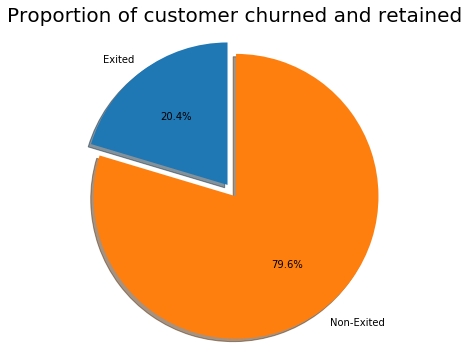

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'Exited','Non-Exited'
sizes = [df.Exited[df.Exited == 1].count(), df.Exited[df.Exited == 0].count()]
explode = (0,0.1)

plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

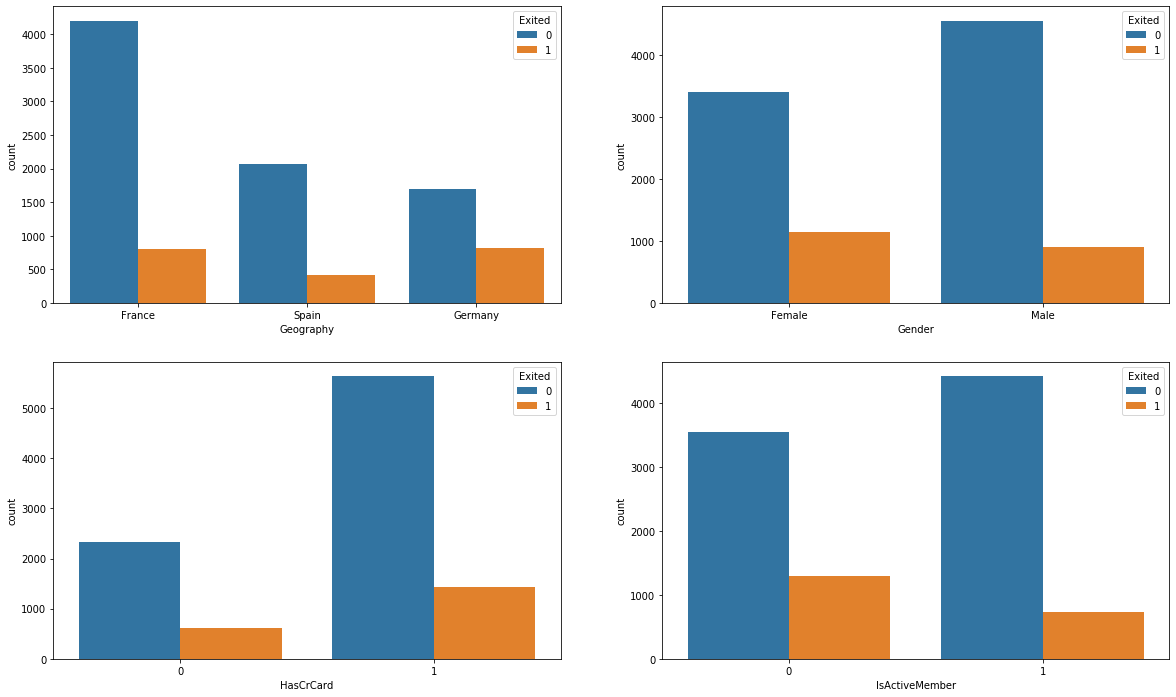

In [6]:
# Relation between Exited status and categorical variables

fig1, ax = plt.subplots(2,2,figsize=(20,12))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[1][1])

## Inference

1. There is more data of customers having France as their country.
2. The proportion of churned customers is more in Germany where the bank has the least count of customers.
3. The proportion of female customers churned is greater than the male.
4. Customers who possess credit cards have churned the most compared to the ones not having it.
5. The inactive customers have a greater churn than the active members.

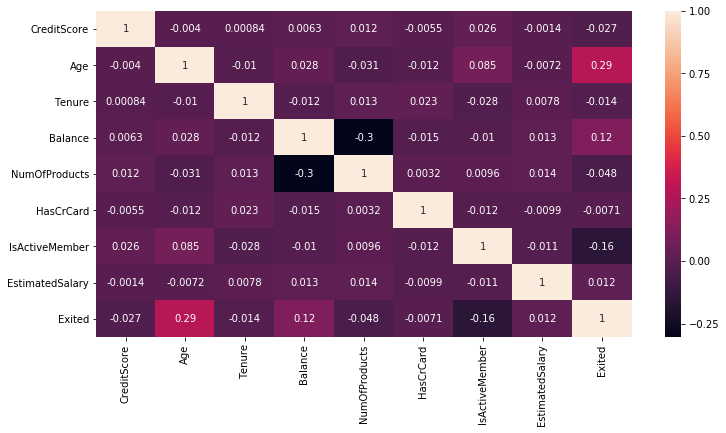

In [7]:
# Correlation between attributes containing numeric values

plt.figure(figsize=(12,6))
sns.heatmap(df.iloc[:,3:len(df)].corr(), annot=True, )

Text(0, 0.5, 'Frequency')

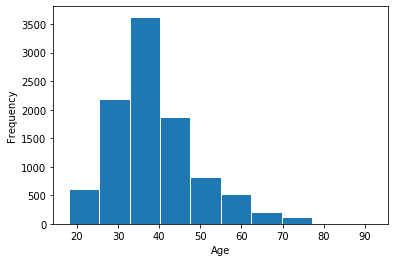

In [8]:
plt.hist(df.Age, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')

    Most of the customers belong to the age group 30-40 

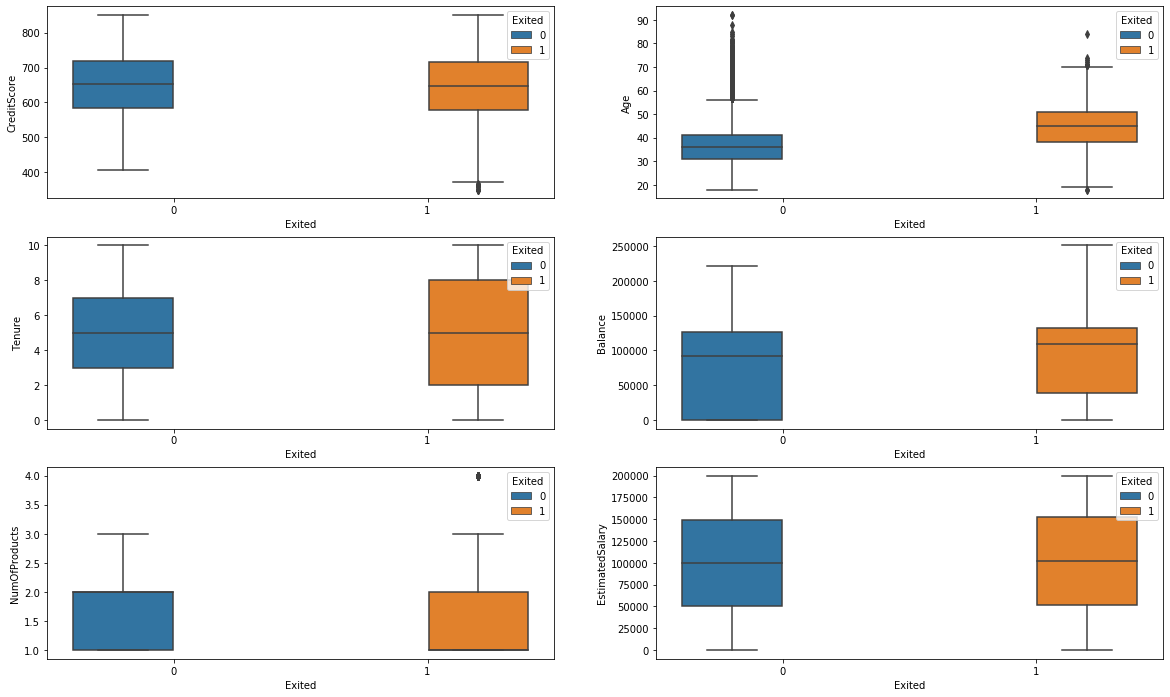

In [9]:
# Relation between Exited status and Quantitative variables

fig2, ax = plt.subplots(3,2,figsize=(20,12))
sns.boxplot(x='Exited', y='CreditScore', hue='Exited', data=df, ax=ax[0][0])
sns.boxplot(x='Exited', y='Age', hue='Exited', data=df, ax=ax[0][1])
sns.boxplot(x='Exited', y='Tenure', hue='Exited', data=df, ax=ax[1][0])
sns.boxplot(x='Exited', y='Balance', hue='Exited', data=df, ax=ax[1][1])
sns.boxplot(x='Exited', y='NumOfProducts', hue='Exited', data=df, ax=ax[2][0])
sns.boxplot(x='Exited', y='EstimatedSalary', hue='Exited', data=df, ax=ax[2][1])

## Inference

1. The credit score distribution is similar for retained and churned customers.
2. Older customers are more churned than the younger ones.
3. Customers on either side of the extreme ends of the tenure scale are more likely to churn.
4. Customers with significant balance have churned.
5. Products and Salary does not have significant impact on churn predictability.

# Data Preprocessing

In [10]:
# Remove unwanted column

df = df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)

In [11]:
# One hot encoding of Categorical variables

# Encode Gender
df["Gender"]=df["Gender"].map(lambda x: 0 if x=='Female' else 1)

In [12]:
# Encode Geography
df = pd.get_dummies(df, columns = ['Geography'])

In [13]:
# Remove one of encoded Geography column to avoid Dummy Variable Trap
# We have chosen Geography_France to drop

df = df.drop(columns = ['Geography_France'], axis=1)

In [14]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


# Model Training

In [15]:
features = df.drop(columns=['Exited'], axis=1)
label = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

In [18]:
# Standardize value in the data frame

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svc.score(x_train,y_train)

0.8681428571428571

In [21]:
svc.score(x_test,y_test)

0.8486666666666667